# Delaware Public School Enrollment Trends

## Background

The State of Delaware has a long and checkered history of systematic racism within it's public school system. Although the State has recently taken steps to address its inherent biases, such as a [lawsuit settlement](https://www.aclu-de.org/en/news/press-release-agreement-reached-county-track-public-schools-litigation) to reasses property values in New Castle County, with the goal of equalizing funding across school districts. Underlying distrust and discriminatory practices still exsist within the public schoool system. This is most prevelent in New Castle Country which is home to the largest percentage of Non-white population in Delaware [See Chart #41 "Non-White Population by County](https://statisticalatlas.com/county/Delaware/New-Castle-County/Race-and-Ethnicity#top) for a detailed breakdown. One often cited cause of Delaware's school segregation problem is the practice of Desegregation busing that occured within New Castle County between 1974 and 1994. With this policy ennacted under-served primarily African American students living within the City of Wilmington were sent to schools in the more affulent and primarily White surronding suburbs. Conversly, the students living in the suburbs of Wilmington were bussed to historically majority African American schools within the city. This practice angered a large amount of parents in the suburbs who did not their children attending school within the city, leading to a concerning distruct in the public school system within the suburban white communities. Subsequently, this sense of distust lead to a mass exodus of White students from the public school system and spurring the overwhelming prevelence of private schools in Delaware. 

## Research Objectives
Through my analysis I intend to demonstrate that the distrust and marginalization of the Delaware Public School System by the White community is not a relic of the past and still persists to this day. I beleive this will demonstrate itself through a significant drop in White student enrollment within the public school system. I would also expect the majority of the changes in enrollment to be occuring in New Castle County due to it having both the largest overall population in Delaware, along with the largest Non-white population and the most significant history of racial discrimination in schools. In order to achive this goal I aim to analyze the recent enrollment trends to the schoool systemn and explain the implications these trends on the school funding system, as well as how the currently fudning system contributes to the aforementioned trends in enrollment. The research questions I asked are as follows:
* What are the enrollment trends of Delaware Public Students broken down by Race?
* How significant are the curernt enrollment trends?
* How and which districts are most affectd by the changes in student enrollment?


## Data Source

The following analysis was done using a publicly available data set provided by the Delaware State Government and which is used to allocate yearly funding and resources to schools within the state.  
[Delaware Enrollment Data Set](https://data.delaware.gov/Education/Student-Enrollment/6i7v-xnmf)


## Ethical Considerations
One of the most important considerations to make while working on this type of analysis is ensuring that the students involved are never degraded to only a set a numbers. While converting attributes into data allows us to gather significant trends, it is important to remember that numbers cannot completely replicated uniqueness of human beings. A second consideration that must be made is the sheer number of stakeholder, both direct and indirect, in the education system. While it is obvious to point out the direct stakeholders such as the studnets, teachers, and government officials, we must also remember the wider societal stakeholders in the form of taxpayers, families, and local communities. Because of all those involved, it is critical that the analysis to follow is not misconstrued or misinterpreted that can be manipulated to advance false narratives.

## Data Set Overview

In [57]:
import pandas as pd 
from pingouin import ancova
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats


df = pd.read_csv("data/Student_Enrollment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738465 entries, 0 to 738464
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   School Year         738465 non-null  int64  
 1   District Code       738465 non-null  int64  
 2   District            738465 non-null  object 
 3   School Code         738465 non-null  int64  
 4   Organization        738465 non-null  object 
 5   Race                738465 non-null  object 
 6   Gender              738465 non-null  object 
 7   Grade               738465 non-null  object 
 8   SpecialDemo         738465 non-null  object 
 9   Geography           738465 non-null  object 
 10  SubGroup            738465 non-null  object 
 11  RowStatus           738465 non-null  object 
 12  Students            401049 non-null  float64
 13  EOYEnrollment       738157 non-null  float64
 14  PctOfEOYEnrollment  401049 non-null  float64
 15  FallEnrollment      660484 non-nul

### Column Descriptions.  
***School Year***: School Year from which the data was collected.  
***District Code***: Number unique the each distinct district.  
***District***: Name of each district.  
***School Code***: Number representing a school within a district.  
***Organization***: Full name of the Organization.  
***Race***: Represents the race/ethnicity of the unique group of students within the school/district.  
***Gender***: Represents the gender of students within the school/district.  
***Grade***: Grade level of the unqiue group of studetns.  
***Special Demo***: Represents the special population status of the unique group of students.  
***Geography***: Represents the geography of the unique group of students.  
***SubGroup***: Represents the unique group of students within a schhool/district described by the combination of Race, Gender, Grade, SpecialDemo and Geography.  
***RowStatus***: Indicates whether the aggregate data in the row has been Redacted or Reported. If redacted, certain data has been hidden to comply with state and federal privacy laws.    
***Students***: Number of students enrolled at the end of the school year.  
***PctOfEOYEnrollment***: The percentage of students enrolled for the specified subgroup divided by the number of students enrolled at the end of the school year.  
***FallEnrollment***: The number of studnets enrolled on September 30th of the specified school year.  
 


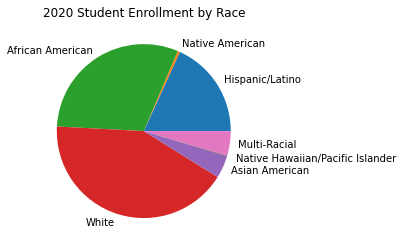

In [58]:
#Isolating State Wide Data
all = "All Students"
all_years = df.loc[(df["District"] == "State of Delaware") & (df["Gender"] == all) & (df["Grade"] == all) & (df["SpecialDemo"] == all) & (df["Geography"] == all)]
indexs = all_years[all_years["Race"] == "All Students"].index
all_years = all_years.drop(indexs)
y2020 = all_years[all_years["School Year"] == 2020]
plt.pie(y2020["Students"], labels=y2020["Race"])
plt.title("2020 Student Enrollment by Race")
plt.show()

Pie Chart snapshot of Delaware Public School Demographics

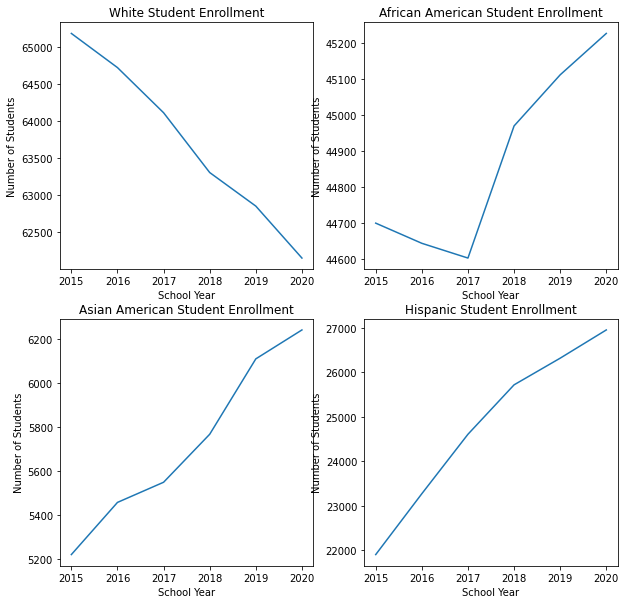

In [59]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(all_years[all_years["Race"] == "White"]["School Year"].values, all_years[all_years["Race"] == "White"]["Students"].values)
ax1.title.set_text("White Student Enrollment")
ax2.plot(all_years[all_years["Race"] == "African American"]["School Year"].values, all_years[all_years["Race"] == "African American"]["Students"].values)
ax2.title.set_text("African American Student Enrollment")
ax3.plot(all_years[all_years["Race"] == "Asian American"]["School Year"].values, all_years[all_years["Race"] == "Asian American"]["Students"].values)
ax3.title.set_text("Asian American Student Enrollment")
ax4.plot(all_years[all_years["Race"] == "Hispanic/Latino"]["School Year"].values, all_years[all_years["Race"] == "Hispanic/Latino"]["Students"].values)
ax4.title.set_text("Hispanic Student Enrollment")
ax1.set_xlabel("School Year")
ax2.set_xlabel("School Year")
ax3.set_xlabel("School Year")
ax4.set_xlabel("School Year")
ax1.set_ylabel("Number of Students")
ax2.set_ylabel("Number of Students")
ax3.set_ylabel("Number of Students")
ax4.set_ylabel("Number of Students")
plt.show()



From an initial look at the above line graphs of changes in Student Enrollment over time as broken down in seperate demographics, we can see that the amount of White students enrolling in public schools seeems to be decreasing while ever other demographic is experiencing an uptick in enrollment. 

### Calculating Pearson's r For Each Group

In [60]:
years = [2015,2016,2017,2018,2019,2020]
White_enrollment_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "White"],years)
African_American_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "African American"], years)
Asian_American_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "Asian American"], years)
Hispanic_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "Hispanic/Latino"], years)

print("White Student Enrollment r: ", White_enrollment_r[0])
print("African American Student Enrollment r: ", African_American_r[0])
print("Asian American r: ", Asian_American_r[0])
print("Hispanic/Latino r: ", Hispanic_r[0])

White Student Enrollment r:  -0.9974150969419623
African American Student Enrollment r:  0.8939061809517638
Asian American r:  0.9892662569850617
Hispanic/Latino r:  0.9851881711114994


From looking at Pearson' coefficient for each group, we can see all enrollment from a strong linear correlation.

### Ancova Test for Significant Variation

In [61]:

ancova(data = all_years, dv="Students", covar="School Year", between = "Race")

,Source,SS,DF,F,p-unc,np2
0,Race,2.242192e+10,6,4718.835502,3.754301e-48,0.998801
1,School Year,3.949943e+06,1,4.987744,3.221537e-02,0.127931
2,Residual,2.692561e+07,34,NaN,NaN,NaN


Since the above p-values are well below the conventional .05, it is safe to assume that the above graphs have a significant difference between them. This is futher illustrated by the large Sum of Squares values, demonstrating a large amount of variance between them. 

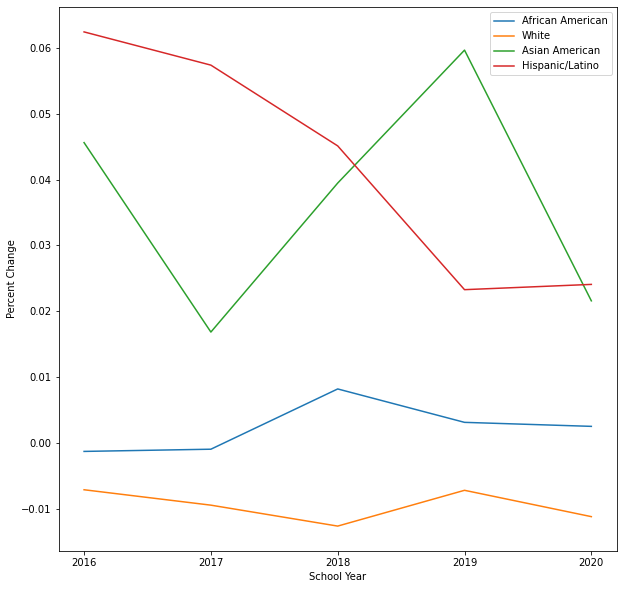

In [62]:
African_American_pct = all_years["Students"][all_years["Race"] == "African American"].pct_change().dropna()
White_pct = all_years["Students"][all_years["Race"] == "White"].pct_change().dropna()
Asian_American_pct = all_years["Students"][all_years["Race"] == "Asian American"].pct_change().dropna()
Hispanic_pct = all_years["Students"][all_years["Race"] == "Hispanic/Latino"].pct_change().dropna()

plt.figure(figsize = (10,10))
plt.plot(years[1:],African_American_pct.values,label = "African American")
plt.plot(years[1:],White_pct.values, label = "White")
plt.plot(years[1:],Asian_American_pct.values, label = "Asian American")
plt.plot(years[1:],Hispanic_pct.values, label = "Hispanic/Latino")
plt.legend(["African American", "White", "Asian American", "Hispanic/Latino"])
plt.xticks(years[1:])
plt.xlabel("School Year")
plt.ylabel("Percent Change")
plt.show()

### Variance in the Rate of Change

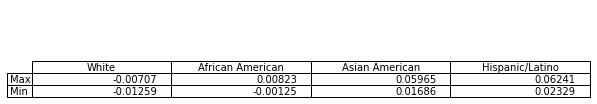

In [87]:
columns = ["White", "African American", "Asian American", "Hispanic/Latino"]
White_max = "{:,.5f}".format(White_pct.max())
African_American_max = "{:,.5f}".format(African_American_pct.max())
Asian_American_max = "{:,.5f}".format(Asian_American_pct.max())
Hispanic_max = "{:,.5f}".format(Hispanic_pct.max())

White_min = "{:,.5f}".format(White_pct.min())
African_American_min = "{:,.5f}".format(African_American_pct.min())
Asian_American_min = "{:,.5f}".format(Asian_American_pct.min())
Hispanic_min = "{:,.5f}".format(Hispanic_pct.min())
row = ["Max", "Min"]
data = [[White_max,African_American_max, Asian_American_max,Hispanic_max], [White_min, African_American_min, Asian_American_min, Hispanic_min]]
plt.figure(figsize=(10,1))
min_max_table = plt.table(cellText=data, colLabels = columns, rowLabels = row)
plt.axis("off")
plt.show()


### Identifying which Districts had the Largest Decrease in Population

In [92]:
#Isolating District Information from larger data set
dist_breakdown = df[(df["School Code"] == 0) & (df["District"] != "State of Delaware")]
dist_breakdown.head()
dist_breakdown = dist_breakdown[(dist_breakdown["Race"] == all) & (dist_breakdown["Gender"] == all) & (dist_breakdown["Grade"] == all) & (dist_breakdown["Geography"] == all) & (dist_breakdown["SubGroup"] == all)]
dist_breakdown = dist_breakdown.sort_values(by = ["District Code","School Year"], ascending = [True,True] )

#Iterates through the isolated dataset specifically pulling information from each district in the years 2015 and 2020
combined_years = pd.DataFrame(columns = ["District", "District Code", "Enroll2015", "Enroll2020"])
for index, row in dist_breakdown.iterrows():
    if row["School Year"] == 2015:
        combined_years = combined_years.append({"District": row["District"], "District Code": row["District Code"], "Enroll2015": row["EOYEnrollment"], "Enroll2020" : 0}, ignore_index = True)
    elif row["School Year"] == 2020:
        combined_years["Enroll2020"].loc[combined_years["District Code"] == row["District Code"]] = row["EOYEnrollment"]

#Calculates the percent change of each district, cleans, and sorts the final data frame
combined_years["PercentChange"] = (combined_years["Enroll2020"] - combined_years["Enroll2015"])/combined_years["Enroll2015"]
combined_years.replace(0,np.nan, inplace= True)
combined_years.isnull().sum()
clean_combined = combined_years.dropna()
clean_combined = clean_combined.sort_values(by="PercentChange",ascending = True)
clean_combined.head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,District,District Code,Enroll2015,Enroll2020,PercentChange
18,Sussex Technical School District,40,1604.0,1258.0,-0.215711
36,Gateway Lab School,92,216.0,185.0,-0.143519
11,Christina School District,33,18452.0,15918.0,-0.137329
31,Academy of Dover Charter School,85,331.0,295.0,-0.108761
29,Family Foundations Academy,80,875.0,811.0,-0.073143
10,Red Clay Consolidated School District,32,19461.0,18187.0,-0.065464
23,East Side Charter School,72,492.0,476.0,-0.032520
2,Lake Forest School District,15,4048.0,3963.0,-0.020998
25,Campus Community Charter School,74,434.0,425.0,-0.020737
22,Positive Outcomes Charter School,71,127.0,125.0,-0.015748


The above list serves as a launching point off for further research. By looking into why these districts lost students and more specifically which demographics of students the districts mostly lost, we can isolate and discover flaws in Delaware's current Public School System. It is also possible to investigate the schools that increased significantly in population to determine why those schools are gaining students while other schools are losing studens.

### Conclusion and Future Work
The work in this report has determined that there has been a significant change in the population of white students within the Delaware Public School System through the use of data visualization and statistical analysis. The data reflected did meet my original hypothesis of an overall decrease in the White population of the public school system, but my expectation of the majority of the decreases in enrollment occuring within New Castle County was subverted. By looking at the school districts with the most significant drop in student enrollment, we find the majoirty of them are located in Kent and Sussex counties instead. While this data can be used as a general guide line and launch point for further exploration of the subject matter, it should by no means be taken as complete and indisputable fact. The significant decrease in White public school student attendance clearly has impactful effects on the before mentioned direct and indirect stakeholder, specifically in the realms of diversity in schools and school funding. The next step in this research are to isolate the sampling size to just the districts most affected by changes in student populations and test hypothesis on why these changes are occurring. The first hypothesis I would like to consider is whether this significant drop was brought on by push or pull factors. A couple of examples of these factors would be if systems of funding were changed to the district, pushing students to leave or if other schooling options in the form of private schools were established in the area pulling students from their districts. 